In [1]:
# Data & Plot Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.formula.api as smf

In [2]:
# Load the dataset

zillow_df=pd.read_csv('zillow_data.csv')

In [3]:
# Explore the info of the dataframe.

zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22515 entries, 0 to 22514
Columns: 284 entries, RegionID to 2022-12-31
dtypes: float64(276), int64(2), object(6)
memory usage: 48.8+ MB


In [4]:
#Print the first 5 rows of the dataframe.

zillow_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253041.0,254862.0,...,754795.0,760368.0,766827.0,771961.0,775700.0,777962.0,779620.0,781589.0,782747.0,782365.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,235321.0,235542.0,...,958517.0,977905.0,995212.0,997168.0,997462.0,982958.0,971301.0,956808.0,953225.0,950715.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,108985.0,108995.0,...,256238.0,260901.0,265355.0,268695.0,270851.0,272191.0,272430.0,273037.0,273431.0,273295.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,164384.0,164777.0,...,305046.0,306378.0,309186.0,311339.0,312572.0,312253.0,312097.0,312197.0,312381.0,310452.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114772.0,114952.0,...,284072.0,289683.0,294718.0,297669.0,298737.0,299066.0,298893.0,298380.0,298942.0,297568.0


In [5]:
# we now pick just San Francisco and save a new dataframe

sf_df = zillow_df[(zillow_df['RegionName'] == 'San Francisco') & (zillow_df['RegionType'] == 'city')]

In [6]:
# we now explore this dataframe

sf_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
14,20330,14,San Francisco,city,CA,CA,"San Francisco-Oakland-Berkeley, CA",San Francisco County,449241.0,451985.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0


In [7]:
sf_df.describe()

,RegionID,SizeRank,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0
25%,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0
50%,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0
75%,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0
max,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0


In [8]:
# we now want to inspect if there are missing values
sf_df.isna().any().sum()

# after applying that code above, we realized that there are no missing values

0

In [9]:
# as we want to make a series line, we will have trouble if the dates are in columns, so we will need to transform
# the dates to indexes

sf_df_tr = sf_df.transpose()
sf_df_tr.head(20)

,14
RegionID,20330
SizeRank,14
RegionName,San Francisco
RegionType,city
StateName,CA
State,CA
Metro,"San Francisco-Oakland-Berkeley, CA"
CountyName,San Francisco County
2000-01-31,449241.0
2000-02-29,451985.0


In [10]:
# now, we want to keep only the data that is useful (date, and values), we are going to slice the dataframe
sf_df_slice = sf_df_tr.iloc[8:,:]
sf_df_slice.head(10)

,14
2000-01-31,449241.0
2000-02-29,451985.0
2000-03-31,455705.0
2000-04-30,463561.0
2000-05-31,472297.0
2000-06-30,481644.0
2000-07-31,491158.0
2000-08-31,500993.0
2000-09-30,510701.0
2000-10-31,520891.0


In [11]:
# now we want to name the columns
sf_df_slice.columns = ['value']
sf_df_slice.head(10)

,value
2000-01-31,449241.0
2000-02-29,451985.0
2000-03-31,455705.0
2000-04-30,463561.0
2000-05-31,472297.0
2000-06-30,481644.0
2000-07-31,491158.0
2000-08-31,500993.0
2000-09-30,510701.0
2000-10-31,520891.0


In [12]:
# for convenience, we will name the df with a shorter name
df = pd.DataFrame(sf_df_slice, columns=['value'])
df.head(5)

,value
2000-01-31,449241.0
2000-02-29,451985.0
2000-03-31,455705.0
2000-04-30,463561.0
2000-05-31,472297.0


In [13]:
# I am having big trouble trying to plot the df, and it seems that the problem was that the 'value' column was not an
# integer number, so "no numeric data to plot" error. I solved it using ChatGPT
df['value'] = df['value'].astype(int)

In [14]:
df.dtypes

value    int32
dtype: object

<AxesSubplot:>

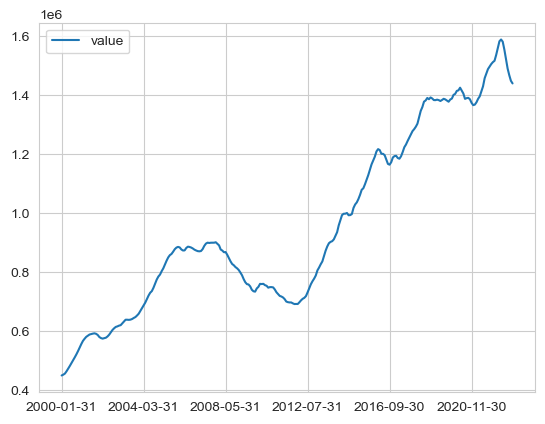

In [15]:
# now we plot the data.

df.plot(kind='line')

In [16]:
# we want to know what is the most recent date in the plot
df.index.max()


'2022-12-31'

In [17]:
# we can see that the values in SF are trending downwards
# we will analyze when was that peak value, because since that date the values started to decrease

df[df['value'] == df['value'].max()]


,value
2022-05-31,1587652


In [18]:
# we can see that the maximum value was in May 2022, and since that date the values have been decreasing

In [19]:
# now, we want to inspect averages per year of the values

# but first, we need to transform the index to a date type (I had this problem when calculating the df.index.year and figured it out using ChatGPT)
df.index = pd.to_datetime(df.index)


grouped = df.groupby(df.index.year)
averages = grouped.mean().astype(int)

In [20]:
print(averages)

        value
2000   489519
2001   581427
2002   593934
2003   639380
2004   723950
2005   845823
2006   878150
2007   891113
2008   849334
2009   762785
2010   750000
2011   704112
2012   733369
2013   869220
2014   990143
2015  1110211
2016  1191401
2017  1228509
2018  1359714
2019  1384197
2020  1396996
2021  1440931
2022  1522927


In [21]:
# now we want to analyze the change year over year of the value. For that, we add a new column with that figure
# for that we used ChatGPT

averages['change_yoy'] = (averages['value'] / averages['value'].shift(1) - 1) * 100 
#(grouped['value'] / grouped['value']).head(3)
# grouped['change_yoy'] = (grouped['value'] / grouped['value'].shift(1) - 1) * 100 

        value  change_yoy
2000   489519         NaN
2001   581427   18.775165
2002   593934    2.151087
2003   639380    7.651692
2004   723950   13.226876
2005   845823   16.834450
2006   878150    3.821958
2007   891113    1.476171
2008   849334   -4.688407
2009   762785  -10.190220
2010   750000   -1.676095
2011   704112   -6.118400
2012   733369    4.155163
2013   869220   18.524235
2014   990143   13.911668
2015  1110211   12.126329
2016  1191401    7.313024
2017  1228509    3.114652
2018  1359714   10.680019
2019  1384197    1.800599
2020  1396996    0.924652
2021  1440931    3.144962
2022  1522927    5.690488


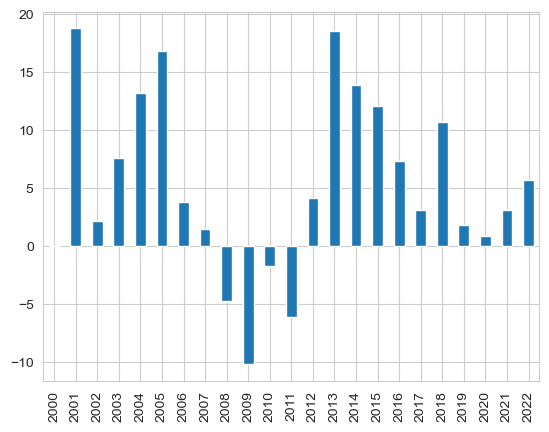

In [22]:
print(averages)
averages['change_yoy'].plot(kind='bar')
plt.show()

In [23]:
# we can see that the maximum increase was between year 2000 and 2001, and the maximum decrease was between years 2008 and 2009 (subprime crisis)

In [24]:
# now we start building the model for the predictions


In [25]:
# first, we will displace the index to a new column within the dataframe
df['date'] = df.index
df['index'] = range(len(df))
df = df.set_index('index')
df = df[['date', 'value']]
df.head(5)

,date,value
index,,
0,2000-01-31,449241
1,2000-02-29,451985
2,2000-03-31,455705
3,2000-04-30,463561
4,2000-05-31,472297


In [35]:
# create a fitted model
lm = smf.ols(formula='value ~ df.index', data=df).fit()

#print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1557.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          5.19e-115
Time:                        20:39:57   Log-Likelihood:                -3615.4
No. Observations:                 276   AIC:                             7235.
Df Residuals:                     274   BIC:                             7242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.675e+05   1.42e+04     32.812      0.0

In [43]:
ypred = 4.675e+05 + 3537 * 300
print(int(ypred))

1528600
